# Introduction to Machine Learning Exercise 2
## Problem 1
### a)
The covariance is given by
$$\text{Cov}(x_1,x_2)=\text{Cor}(x_1,x_2)\sqrt{\text{Var}(x_1)\text{Var}(x_2)}.$$
Using this we can form the covariance matrix with the given values.

In [1]:
library(MASS) 

var1 <- 2 
var2 <- 3 
corr12 <- -.75 
cov12 <- sqrt(var1 * var2) * corr12 
sigma <- matrix(c(var1, cov12, cov12, var2), nrow = 2) 
mu <- c(0,0) 

In [2]:
sigma

2.000000,-1.837117
-1.837117,3.000000


Next we evaluate the empirical covariance matrix.

In [35]:
set.seed(12345)
X <- mvrnorm(200, mu, sigma) 
cov(X) 

2.251491,-2.167901
-2.167901,3.303050


The correlation coefficient is pretty close to the exact value, as expected.

In [43]:
cor(X[,1],X[,2])

[1] -0.7949626

### b)

Some visualization below.

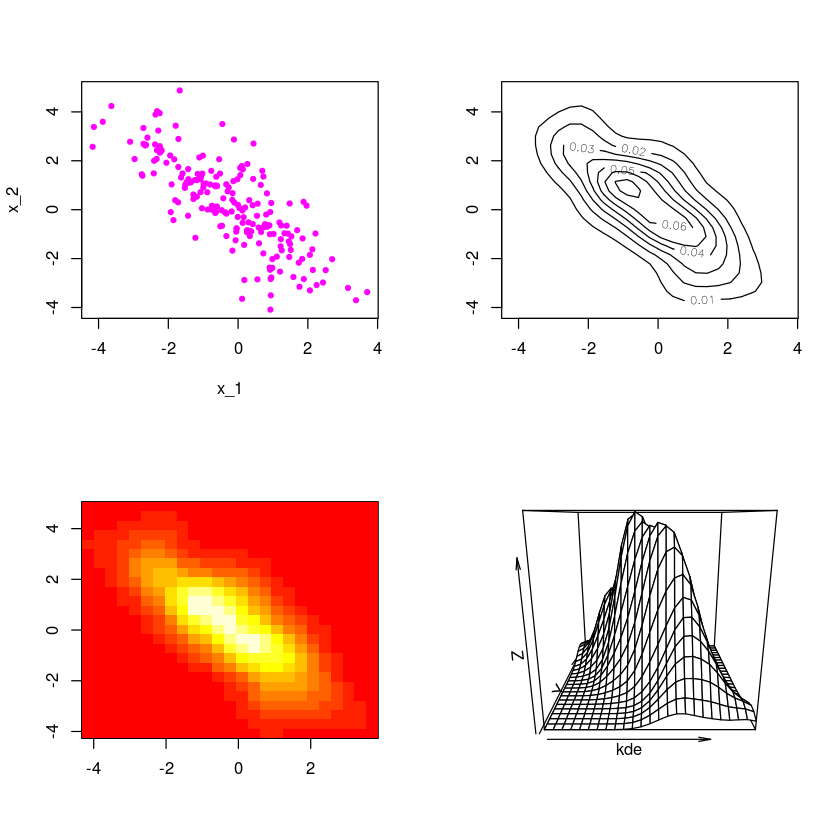

In [71]:
kde <- kde2d(X[ ,1], X[ ,2])

par(mfrow = c(2,2))
plot(X, pch = 20, col = 'magenta', xlab = "x_1", ylab = "x_2")
contour(kde)
image(kde)
persp(kde)

### c) 
Define a function to calculate the density of the normal distribution.

In [45]:
density <- function(x, mu, sigma) {
  p <- length(mu)
  b <- apply(x, 1, function(row) (row - mu) %*% solve(sigma) %*% (row-mu))
  return(1 / ((2 * pi)^(p/2) * sqrt(det(sigma))) * exp(-b / 2))
}

Form a grid for the values of the density function.

In [46]:
grid <- expand.grid(0.25*(-20:20), 0.25*(-20:20))
grid_density <- density(grid, mu, sigma)
grid_matrix <- matrix(grid_density, nrow = 41)
grid_matrix[1,1]

[1] 1.130681e-19

The first value is the same as in the exercise sheet, as desired. Again some visualization.

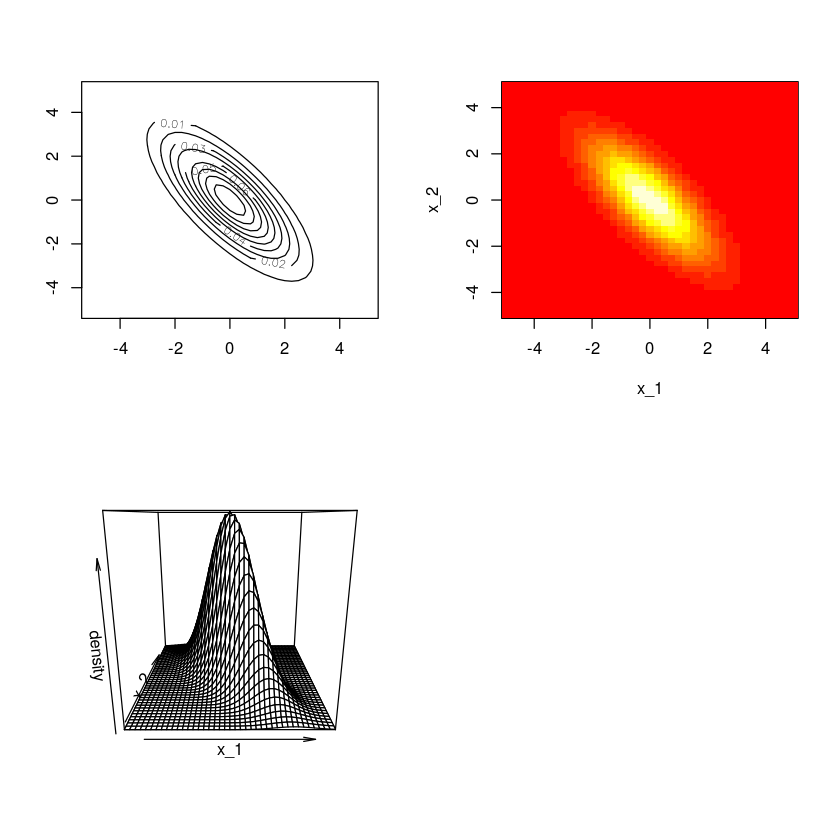

In [47]:
par(mfrow = c(2,2))
contour(0.25*(-20:20), 0.25*(-20:20), grid_matrix)
image(0.25*(-20:20), 0.25*(-20:20), grid_matrix, xlab = "x_1", ylab = "x_2")
persp(0.25*(-20:20), 0.25*(-20:20), grid_matrix, xlab = "x_1", ylab = "x_2", zlab = "density")

### d)
Make a second distribution with mean $\mathbf{\mu} =(2,1)$ but with the same covariance matrix.

In [49]:
mu2 <- c(2,1)
grid_density2 <- density(grid, mu2, sigma)
grid_matrix2 <- matrix(grid_density2, nrow = 41)

And finally we calculate the probability
$$
f(Y=1|\mathbf{x})=\frac{f_1(\mathbf{x_1})\pi_1}{f_1(\mathbf{x_1})\pi_1 + f_2(\mathbf{x_2})\pi_2},
$$
where $\pi_1=\pi_2=1/2$.

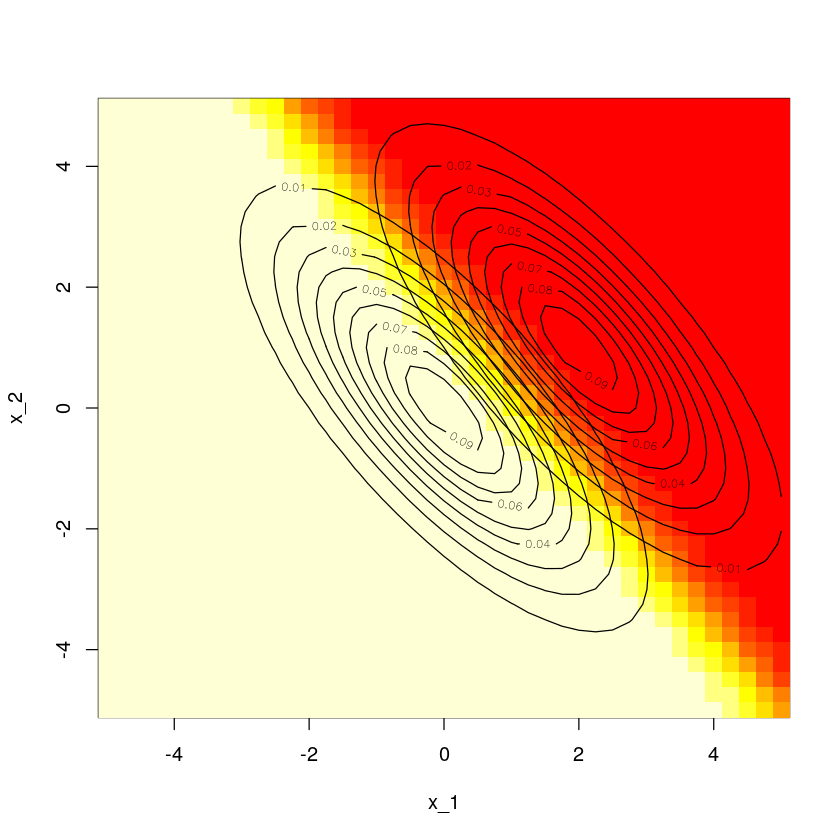

In [50]:
p <- grid_matrix / (grid_matrix + grid_matrix2) 

image(0.25*(-20:20), 0.25*(-20:20), p, xlab = "x_1", ylab = "x_2")
contour(0.25*(-20:20), 0.25*(-20:20), grid_matrix, add = T)
contour(0.25*(-20:20), 0.25*(-20:20), grid_matrix2, add = T)

The decision boundary is linear. However, if we change the second covariance matrix to the identity matrix, we get a nonlinear boundary.


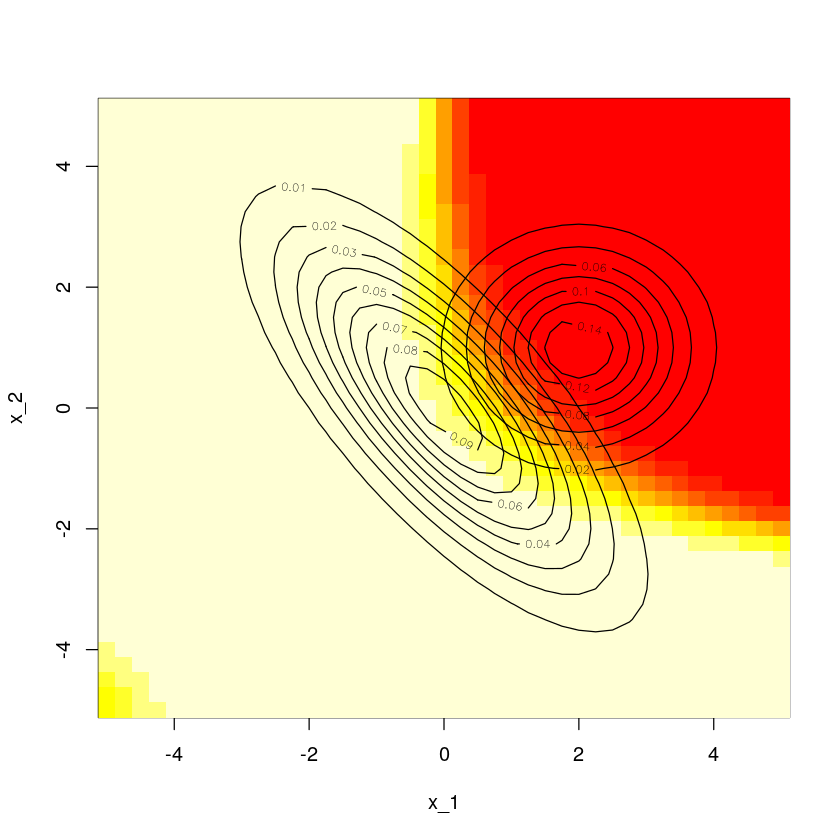

In [55]:
sigma <- matrix(c(1, 0, 0, 1), nrow = 2) 
mu2 <- c(2,1)
grid_density2 <- density(grid, mu2, sigma)
grid_matrix2 <- matrix(grid_density2, nrow = 41)

p <- grid_matrix / (grid_matrix + grid_matrix2) 

image(0.25*(-20:20), 0.25*(-20:20), p, xlab = "x_1", ylab = "x_2")
contour(0.25*(-20:20), 0.25*(-20:20), grid_matrix, add = T)
contour(0.25*(-20:20), 0.25*(-20:20), grid_matrix2, add = T)


## Problem 2
###  a)

It's quite easy to evaluate the RHS and show that it's equivalent to the LHS. We begin by noting that for diagonal matrices the determinant is equal to the product of its diagonal entries. Because $\boldsymbol{\Sigma}$ is a diagonal matrix, the square root of its determinant is thus 
$$
|\boldsymbol{\Sigma}|^{1/2} = \left(\prod_{i=1}^p \sigma_i^2\right)^{1/2} = \prod_{i=1}^p \sigma_i,
$$
and assuming non-zero diagonal entries, its inverse is simply
$$
\boldsymbol{\Sigma}^{-1} = \text{diag}\left(\frac{1}{\sigma_1^2}, \dots , \frac{1}{\sigma_p^2}\right).
$$
Now we can already evaluate the matrix product in the exponent of the RHS:
$$
\begin{split}
(\mathbf{x} - \boldsymbol{\mu})^T	 \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) &= 
\begin{bmatrix}
x_1 - \mu_1 & \dots & x_p - \mu_p
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sigma_1^2} & 0 & \dots & 0 \\
0 & \frac{1}{\sigma_2^2} & \dots & 0 \\
\vdots & \vdots & & \vdots \\ 
0 & 0 & \dots & \frac{1}{\sigma_p^2}
\end{bmatrix}
\begin{bmatrix}
x_1-\mu_1 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&= \begin{bmatrix}
\frac{x_1 - \mu_1}{\sigma_1^2} & \dots & \frac{x_p - \mu_p}{\sigma_p^2}
\end{bmatrix}
\begin{bmatrix}
x_1-\mu_1 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&= \sum_{i=1}^p \frac{(x_i - \mu_i)^2}{\sigma_i^2}.
\end{split}
$$
Thus, the right hand side equals the left hand side.

### b)
Taking the natural logarithm of both sides we find
\begin{split}
\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}e^{-b/2} &= a \\
e^{-b/2} &= a(2\pi)^{p/2}|\Sigma|^{1/2} \\
b &=-2\ln a -p\ln(2\pi)-\ln |\Sigma|.
\end{split}

The determinant is now $|\Sigma|=1\cdot2\cdot3=6$. Substituting $p=3$ and $a=1/100$ we get $b=1.90495$.



In [5]:
p <- 3
a <- 1/100
sigma <- diag(1:3)
b <- -2*log(a)-p*log(2*pi)-log(det(sigma))
b

[1] 1.90495

## Problem 3
### a)
The generative model does have a higher asymptotic error, but it also reaches this error faster than the discriminative one. As the sample size $n$ is increased, there appears two distinct regimes: one in which the generative model reaches its asymptotic error faster and is thus doing better and one where the discriminative model has already reached its lower asymptotic error. This implies that generative models may be more precise with small sample size, although discriminative models have usually been considered superior.

### b)
The discriminative model tries to maximize the conditional probability $p(\mathbf{y}|x)$ or to minimize the 0-1 training error, while the generative model tries to maximize the joint probability $p(\mathbf{x},y) $.

In the discrete case the probabilites $p(x_i|y)$ follow the Bernoulli distribution, while in the continuous case $p(x_i|y)$ are normally distributed. The generative-discriminative pairs are naive Bayes-logistic regression in the first case, and normal discriminant analysis-logistic regression in the latter.

### c)
The generative model indeed seems to reach the asymptotic error (much) faster than the discriminative one, but the discriminative one dominates when the number of training samples is large. In some cases the discriminative one is unable to reach the generative one, so it needs more training samples to reach its asymptotic limit. So the generative models might be better with low sample sizes, implied in part a).